In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1.Read data from excel file

In [2]:
df=pd.read_excel('Data_Excel.xlsx')
df.head() #print the first 5 lines

,Province,Ho Chi Minh,Ha Noi,Hai Phong,Can Tho,Dong Nai,Quang Nam,Bac Ninh,Hai Duong,Nghe An,...,Ha Nam,Hung Yen,Kien Giang,Lai Chau,Da Nang,Dak Nong,Dien Bien,Vinh Phuc,Latitude,Longitude
0,Ho Chi Minh,0.000000,1160.328125,1116.327582,124.340009,30.558650,597.455091,1160.851404,1132.378709,885.694721,...,1094.960639,1124.167884,253.245571,1338.581425,612.139008,197.376884,1284.528508,1184.499927,10.7638,106.6436
1,Ha Noi,1160.328125,0.000000,126.385860,1235.554616,1144.991818,656.690777,59.499238,88.532125,274.868404,...,75.458333,61.937428,1253.715745,264.688208,632.876926,1012.092866,258.969150,25.156596,21.1382,105.5050
2,Hai Phong,1116.327582,126.385860,0.000000,1201.305114,1098.305041,575.045991,74.855725,38.212372,257.613414,...,81.046226,67.797153,1233.502621,388.365117,552.142680,954.684700,385.354979,131.855404,20.8000,106.6667
3,Can Tho,124.340009,1235.554616,1201.305114,0.000000,154.836491,706.318330,1240.919573,1214.553251,961.075782,...,1173.594679,1203.685561,141.402052,1397.101956,719.138646,318.316161,1340.060030,1260.217144,10.0333,105.7833
4,Dong Nai,30.558650,1144.991818,1098.305041,154.836491,0.000000,572.923473,1144.164266,1115.131849,870.755856,...,1078.756363,1107.678552,282.901262,1327.577244,588.201480,169.248401,1274.383073,1168.998580,10.9277,106.8681


# 2.Visualization: provinces using  Latitude and Longtitude from data

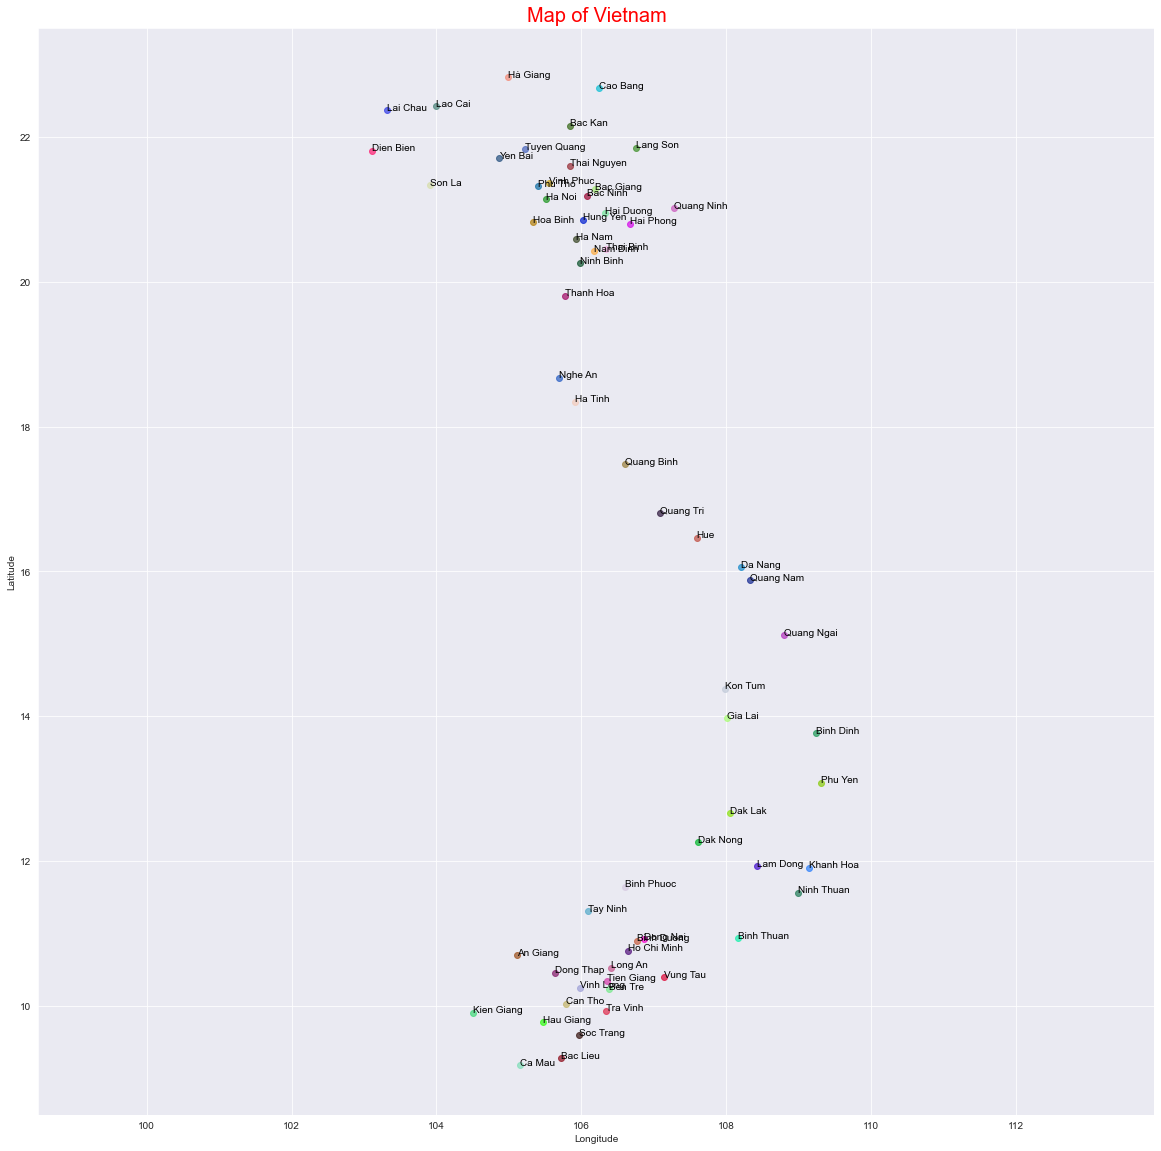

In [3]:
# Visualize
Longitude, Latitude, Province = df["Longitude"],df["Latitude"],df["Province"]

# change style plt
sns.set_style("darkgrid")

# size fig
plt.figure(figsize = (20,20))

# scatter
# plt.scatter(Longitude,Latitude, c = color, alpha = 0.4)

for x, y in zip(Longitude, Latitude):
    rgb = np.random.rand(3,)
    plt.scatter(x, y, c=[rgb], alpha = 0.7)

plt.axis([102,110,8,30])
plt.axis("equal")

# label
plt.title("Map of Vietnam", color = "red",fontsize = 20, alpha = 1)
plt.xlabel("Longitude", fontsize = 10)
plt.ylabel("Latitude", fontsize = 10)

for i in range(len(Province)):
    plt.text(Longitude[i],Latitude[i],Province[i],color = "black", fontsize = 10,alpha = 1)
# show
plt.show();

# 3.Initialize the values of the problem

In [4]:
# Start , End:
start=input('Start: ')
end=input('End: ')
# number main warhouse(3-5 main warehouse)
#n=int(input())
# main warehouses:
#list_main_warehouse=[]
#for i in range(n):
#    list_main_warehouse.append(input())
#list_main_warehouse 
#cost of flight and cost_road (milion VNĐ/h)
#cost_flight=10
#cost_road=0.5
#velocity of flight and velocity of road (km/h)
#velocity_flight=950
#velocity_road=80
print(start)

Start: Thanh Hoa
End: Quang Nam
Thanh Hoa


# 4. Convert matrix into list : distance provices

In [5]:
# we convert matrix distance into list distance
list_distance=[]
for i in df.values:
    list_distance.append(list(i[1:-2]))
print(list_distance[0])
# we convert province into index in list distance
dict_index_province={}
for i in range(len(Province)):
    dict_index_province[Province[i].strip()]=i
print(dict_index_province)
# example of how to get the distance between 2 provinces
list_distance[dict_index_province['Vinh Phuc']][dict_index_province['Can Tho']]# distance Vinh Phuc to Can Tho

[0.0, 1160.328125307107, 1116.327581802065, 124.340008794874, 30.5586502476945, 597.4550908384311, 1160.851404175675, 1132.378709454002, 885.6947213342979, 642.2067956235431, 1010.212451202627, 300.4857814008529, 1075.26044413697, 261.265604015772, 1208.275219211866, 67.57105090003915, 240.1573238181206, 436.887325752567, 148.8775375321979, 167.0169124814286, 1180.996234104405, 1077.443119273608, 537.6457572318318, 233.1656422377148, 20.66979307944501, 388.4239577973921, 193.4550415653024, 115.5178958606144, 166.5915307900105, 270.9434670459997, 1141.59601872699, 846.771545746579, 747.4236408044728, 1232.931512743067, 386.6332662050546, 36.72169888070128, 97.75035244313683, 1058.005018436204, 85.45783350841474, 56.11735473867661, 1126.947727120911, 428.1045371138408, 92.43730842840938, 168.433418614891, 1231.088805924362, 673.7591032631532, 1326.705847902485, 65.51581351638117, 1169.929014907036, 1325.329840468724, 98.7310405656501, 1352.918818153952, 1240.050578596897, 1269.5427181196

1260.217143922348

# 5.Data about neighbour of the neighbor of the province

In [6]:
data_neighbour={'Thanh Hoa':['Nghe An'],'Nghe An':['Ha Tinh','Thanh Hoa'],'Quang Binh':['Ha Tinh','Quang Tri'] ,\
                'Ha Tinh':['Nghe An','Quang Binh'],'Quang Tri':['Quang Binh','Hue'],'Hue':['Quang Tri','Da Nang','Quang Nam'],\
               'Da Nang':['Hue','Quang Nam']}
data_neighbour
# chưa hoàn thiện, thử 1 số tỉnh thôi

{'Thanh Hoa': ['Nghe An'],
 'Nghe An': ['Ha Tinh', 'Thanh Hoa'],
 'Quang Binh': ['Ha Tinh', 'Quang Tri'],
 'Ha Tinh': ['Nghe An', 'Quang Binh'],
 'Quang Tri': ['Quang Binh', 'Hue'],
 'Hue': ['Quang Tri', 'Da Nang', 'Quang Nam'],
 'Da Nang': ['Hue', 'Quang Nam']}

# 6. IDA_star

In [28]:
import time
start_time = time.time()
start='Thanh Hoa'
goal='Quang Nam'
def IDA_star():
    #define a threshold: theta =f(root_node) with f(n)=h(n)+g(n)
    threshold=list_distance[dict_index_province[start]][dict_index_province[goal]] 
    while True: # run infinity
        temp=search(start,0,threshold) #function search(node,g score,threshold)
        if temp=='FOUND': #if goal found
            return ('FOUND',threshold)
        threshold=temp
def search(node,g,threshold):  #recursive function
    f=g+list_distance[dict_index_province[node]][dict_index_province[goal]]
    if (f>threshold):#greater f encountered
        return f
    if node==goal:   #Goal node found
        return 'FOUND'
    minn=10**10 #minn= Minimum integer
    for tempnode in nextnodes(node):
        #recursive call with next node as current node for depth search
        temp=search(tempnode,g+list_distance[dict_index_province[node]][dict_index_province[tempnode]],threshold)
        if temp=='FOUND':# if goal found
            return 'FOUND'
        if (temp<minn):# find the minimum of all f greater than threshold encountered  
            minn=temp        
    return minn #//return the minimum f encountered greater than threshold
def nextnodes(node):
    return data_neighbour[node] #return list of all possible next nodes from node
print(IDA_star()) 
end_time=time.time()
print(end_time-start_time)

('FOUND', 549.9108321312042)
0.0009932518005371094


In [10]:
# kiểm tra độ chính xác của thuật toán IDA_star
s=['Thanh Hoa','Nghe An','Ha Tinh', 'Quang Binh' ,'Quang Tri','Hue','Quang Nam']
dis=0
for i in range(len(s)-1):
    dis=dis+list_distance[dict_index_province[s[i]]][dict_index_province[s[i+1]]]
dis   

549.9108321312042